## Fraud Detection Tool - Python Implementation

### Random Forest Classifier on Car Claims Dataset



In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("G:/MDSC-20/Fraud detection tool/SSSIHL-InsuranceFraudClassifier-main/SSSIHL-InsuranceFraudClassifier-main/xtra/carclaims.csv")

In [5]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


## Categorical columns convert to numerical columns with integer values

In [6]:
num_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])

In [7]:
print(f'number of numerical and categorical columns are :\n{num_data.shape[1],cat_data.shape[1]}')

number of numerical and categorical columns are :
(8, 25)


In [8]:
cols = cat_data.columns
cols

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days:Policy-Accident',
       'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in cols:
    data[i]= label_encoder.fit_transform(data[i])

In [10]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,2,5,6,6,1,6,5,1,0,2,...,3,0,0,0,3,0,2,1994,2,0
1,4,3,6,6,1,2,5,4,1,2,...,4,1,0,0,3,3,0,1994,1,0
2,10,5,0,6,1,5,10,2,1,1,...,6,0,0,0,3,3,0,1994,1,0
3,6,2,2,17,0,1,6,1,1,1,...,7,1,0,0,2,3,0,1994,2,0
4,4,5,1,6,1,6,4,2,0,2,...,4,0,0,0,3,3,0,1994,1,0


In [11]:
data.shape

(15420, 33)

In [12]:
drpcols = ['PolicyNumber','RepNumber']
carclaims = data.drop(drpcols,axis=1)

In [13]:
carclaims.shape

(15420, 31)

## Imbalance

In [14]:
carclaims['FraudFound'].value_counts()

0    14497
1      923
Name: FraudFound, dtype: int64

In [15]:
X = carclaims.drop('FraudFound',axis=1)
y = carclaims['FraudFound']

In [16]:
y.value_counts()

0    14497
1      923
Name: FraudFound, dtype: int64

## Modelling

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted)}')

Accuracy Score:
0.941958495460441


but the data has the imbalance...

## SMOTE

In [19]:
import imblearn
print(imblearn.__version__)

0.9.1


In [20]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [21]:
X, y = oversample.fit_resample(X, y)

In [22]:
X.shape , y.shape

((28994, 30), (28994,))

In [23]:
y.value_counts()

0    14497
1    14497
Name: FraudFound, dtype: int64

### Imbalance is removed from the data.

now applying the Random forest again on train data and predictions made on test to check accuracy score...

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted)}')

Accuracy Score:
0.9570615623383342


Accuracy improved from 94% to 95% after using SMOTE.

## Evaluation metrics for a Classification model

Accuracy<br>
Confusion Matrix<br>
Precision <br>
recall <br>
f-score <br>
AUC-ROC curves<br>

#### **Accuracy:**
The accuracy of a classifier is calculated as the ratio of the total number of correctly predicted samples by the total number of samples.

In [26]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predicted)}")

Accuracy of the classifier is: 0.9570615623383342


#### **Confusion Matrix:**
A confusion matrix is an N dimensional square matrix, where N represents total number of target classes or categories. Confusion matrix can be used to evaluate a classifier whenever the data set is imbalanced.




**There are four important terms in a confusion matrix**

 True Positives (TP): These are the cases where the predicted “Yes” actually belonged to class “Yes”.
 
 True Negatives (TN): These are the cases where the predicted “No” actually belonged to class “No”.
 
 False Positives (FP): These are the cases where the predicted “Yes” actually belonged to class “No”.
 
 False Negatives (FN): These are the cases where the predicted “No” actually belonged to class “Yes”.

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### Wrongly Predicted Cases

In [28]:
print(f"Type-I Error : (False-Positives) :",confusion_matrix(y_test, predicted)[0][1])
print(f"Type-II Error: (False-Negatives) :",confusion_matrix(y_test, predicted)[1][0])

Type-I Error : (False-Positives) : 168
Type-II Error: (False-Negatives) : 81


### Correctly Predicted Cases

In [29]:
print(f"True-Negatives : ",confusion_matrix(y_test, predicted)[0][0])
print(f"true-Positives : ",confusion_matrix(y_test, predicted)[1][1])

True-Negatives :  2731
true-Positives :  2819


In [30]:
print(confusion_matrix(y_test, predicted))

[[2731  168]
 [  81 2819]]


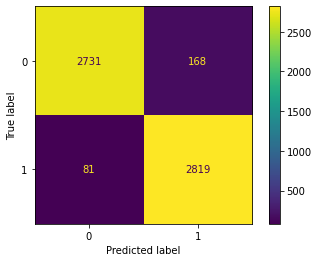

In [31]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

Accuracy = (TP + TN) / (TP + FP + TN + FN)

#### **Precision** (or Positive Predictive Value):
Precision is the ratio of true positives (TP) by the sum of true positives (TP) and false positives (FP).

In [32]:
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predicted)}")

Precision Score of the classifier is: 0.9437562772012053


#### **Recall (or Sensitivity or True Positive Rate):**
Recall is the ratio of true positives (TP) by the sum of true positives (TP) and false negatives (FN).

In [33]:
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predicted)}")

Recall Score of the classifier is: 0.9720689655172414


#### **F1 Score:**
F1 score should be used when both precision and recall are important for the use case. F1 score is the harmonic mean of precision and recall.

In [34]:
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predicted)}")

F1 Score of the classifier is: 0.9577034143027009


#### **AUC-ROC Curve:**
AUC-ROC Curve is a performance metric that is used to measure the performance for the classification model at different threshold values. ROC is Receiver Operating Characteristic Curve and AUC is Area Under Curve. The higher the value of AUC (Area under the curve), the better is our classifier in predicting the classes.

In [35]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for our classifier is: {roc_auc}")

AUC for our classifier is: 0.9910517895588253


**plotting ROC**

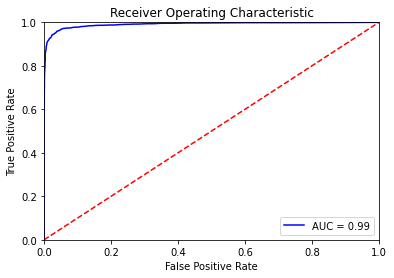

In [36]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()